[View in Colaboratory](https://colab.research.google.com/github/lejh1/First-Machine-Learning-Project/blob/master/First_ML_Project.ipynb)

In [0]:
import tensorflow as tf 
from tensorflow import keras #High level API to build and train models 
import numpy as np 
import matplotlib.pyplot as mp



In [0]:
print(tf.__version__) #Just to check for tensorflow updates

In [0]:
# Hello World of ML using Fashion MNIST 
# (Modified National Institute of Standards and Technology database)
# Come with Tensorflow
f_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = f_mnist.load_data()
# Tuple of NumPy Arrays; 4 total arrays 
# train_images and train_labels are training set - data used to learn
# test_images and test_labels - tested against test set 
# images - 28x28 NumPy arrays w/ pixel values 
# labels - ints 0-9

Label	Class
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# Class names not including in dataset so create our own 

In [0]:
# Exploring Data - not needed for actual training process

# Used to see len and array dimensions
print(train_images.shape)
print(test_images.shape)


# train_labels 

In [0]:
#Preprocessing the data - BOTH traingin and testing set
# SHOW_INSPECT = True
SHOW_INSPECT = False

# Inspecting the first image in training set 
if SHOW_INSPECT:
  mp.figure()
  mp.imshow(train_images[0])
  mp.colorbar()
  mp.gca().grid(False)
  mp.xlabel(class_names[train_labels[0]])


  
# Scale pixel value from 255 to 0:1 before feeding to neural network model 
train_images = train_images / 255.0
test_images = test_images / 255.0

if SHOW_INSPECT:
  mp.figure()
  mp.imshow(train_images[0])
  mp.colorbar()
  mp.gca().grid(False)
  mp.xlabel(class_names[train_labels[0]])


In [0]:
# Quick test to see if images are labeled correctly
mp.figure(figsize=(10,10))
for i in range(25):
    mp.subplot(5,5,i+1)
    mp.xticks([])
    mp.yticks([])
    mp.grid('off')
    mp.imshow(train_images[i], cmap=mp.cm.binary)
    mp.xlabel(class_names[train_labels[i]])

In [0]:
# Building Model 

# Configure the Layers
model = keras.Sequential([
    #First Layer
    keras.layers.Flatten(input_shape = (28, 28)),
    # Transforms the format of the images from a 2d array 28x28  to a 1d 28*28
    
    #See second quote below
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])


"The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. And, hopefully, these representations are more meaningful for the problem at hand. Most of deep learning consists of chaining together simple layers. "

"After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely-connected, or fully-connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer is a 10-node softmax layer—this returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes."


In [0]:
# Compile the Model  - Still need to look into this
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Compile the model
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

---
Loss function —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.

---
Optimizer —This is how the model is updated based on the data it sees and its loss function.

---
Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [52]:
# Train the model 

# Steps
# 1: Feed training data to model ie images to labels 
# 2: Model connects images to labels
# 3: Model makes predications and we verfiy

model.fit(train_images, train_labels, epochs = 5)
#epoch - entire processing by the learning algorithm of the entire train-set.

Epoch 1/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.4974 - acc: 0.8256
Epoch 2/5
60000/60000 [==============================] - 5s 83us/step - loss: 0.3756 - acc: 0.8640
Epoch 3/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.3369 - acc: 0.8767
Epoch 4/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.3116 - acc: 0.8860
Epoch 5/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.2950 - acc: 0.8917


10000/10000 [==============================] - 0s 30us/step
Test Acc: 0.8656
Test Loss: 0.37860121910572053


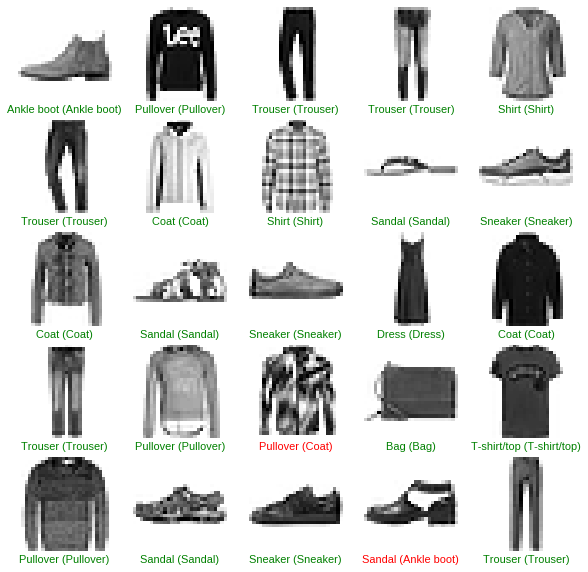

In [54]:
# Evaluate accuracy - need to read up on optimal acc parameters
# Compare how model does with test data 
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Acc:', test_acc)
print('Test Loss:', test_loss)

# Plot the first 25 test images, their predicted label, and the true label
# Color correct predictions in green, incorrect predictions in red
predictions = model.predict(test_images)

mp.figure(figsize=(10,10))
for i in range(25):
    mp.subplot(5,5,i+1)
    mp.xticks([])
    mp.yticks([])
    mp.grid('off')
    mp.imshow(test_images[i], cmap=mp.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    mp.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)
      